In [14]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
data_dir = Path("datasets")

In [15]:
# Diabetes: predict Outcome
file_path = data_dir / 'pima-indians-diabetes-database' / 'diabetes.csv'
diabetes_data = pd.read_csv(file_path)

# Diabetes analysis - Data description 

In [16]:
diabetes_data.shape

(768, 9)

In [17]:
diabetes_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
362,5,103,108,37,0,39.2,0.305,65,0
213,0,140,65,26,130,42.6,0.431,24,1
460,9,120,72,22,56,20.8,0.733,48,0
104,2,85,65,0,0,39.6,0.930,27,0
707,2,127,46,21,335,34.4,0.176,22,0
480,3,158,70,30,328,35.5,0.344,35,1
596,0,67,76,0,0,45.3,0.194,46,0
563,6,99,60,19,54,26.9,0.497,32,0
723,5,117,86,30,105,39.1,0.251,42,0
639,1,100,74,12,46,19.5,0.149,28,0


In [18]:
# For convenience I changed column names to lower case. 
diabetes_data = diabetes_data.rename(columns=str.lower)
diabetes_data.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [19]:
diabetes_data.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# There are no NAs in the dataframe 
diabetes_data.isna().mean()

pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64

In [21]:
# but there are a lot of zero values which doesn't make sanse.
(diabetes_data == 0).astype(int).sum()

pregnancies                 111
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                     500
dtype: int64

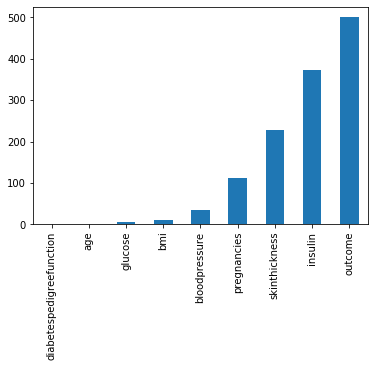

In [22]:
# Number of zeros per feature
(diabetes_data == 0).astype(int).sum().sort_values().plot.bar()

In [23]:
# Create new df for the clean data named df. 
df = diabetes_data.copy()

(array([377.,   8.,  29.,  38.,  35.,  38.,  32.,  38.,  22.,  25.,  24.,
         17.,  13.,  10.,   6.,   5.,  10.,   5.,   3.,   7.,   1.,   2.,
          2.,   2.,   1.,   0.,   1.,   1.,   5.,   2.,   1.,   1.,   2.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.  ,  16.92,  33.84,  50.76,  67.68,  84.6 , 101.52, 118.44,
        135.36, 152.28, 169.2 , 186.12, 203.04, 219.96, 236.88, 253.8 ,
        270.72, 287.64, 304.56, 321.48, 338.4 , 355.32, 372.24, 389.16,
        406.08, 423.  , 439.92, 456.84, 473.76, 490.68, 507.6 , 524.52,
        541.44, 558.36, 575.28, 592.2 , 609.12, 626.04, 642.96, 659.88,
        676.8 , 693.72, 710.64, 727.56, 744.48, 761.4 , 778.32, 795.24,
        812.16, 829.08, 846.  ]),
 <a list of 50 Patch objects>)

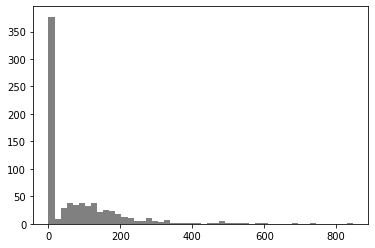

In [24]:
# Lets have a look on the distribution of features that have zeros.
# Skin thikness & insulin have a large amount of zero values!
plt.hist(diabetes_data.insulin, bins=50, color = 'grey')

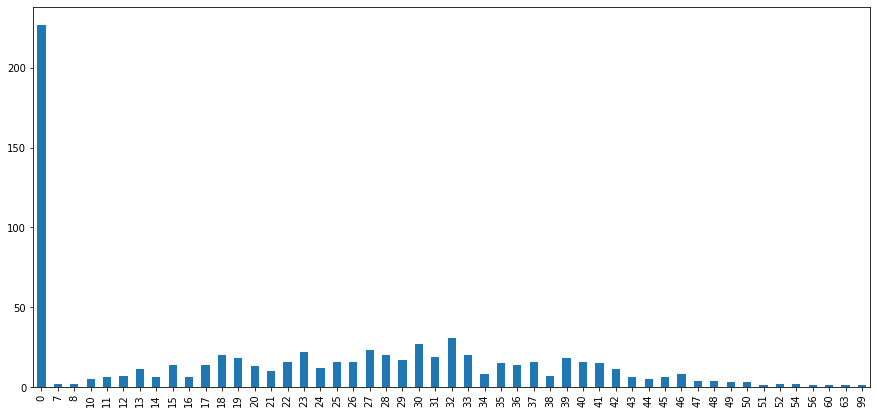

In [25]:
plt.figure(figsize = (15, 7))
diabetes_data.skinthickness.value_counts().sort_index().plot.bar()

## Imputing zeros to median values

Text(0, 0.5, 'Percent')

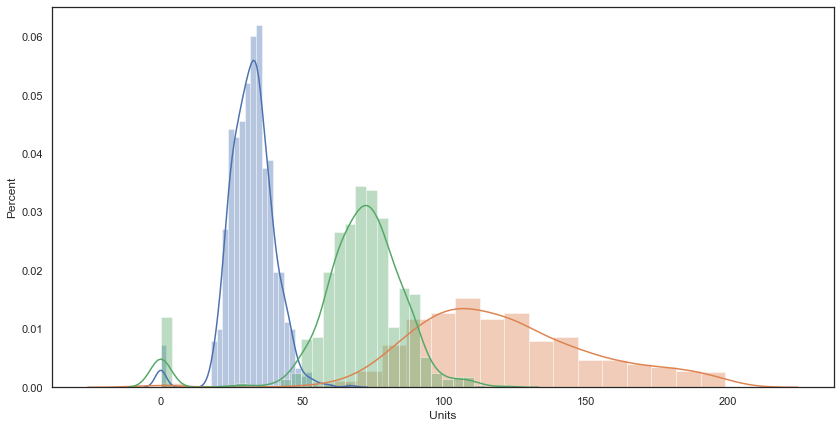

In [28]:
from matplotlib import pyplot
import seaborn as sns

sns.set(style='white', color_codes=True)

# Features who have small amount of zero values - BMI, Glucose, Bloodpressure. 
plt.figure(figsize = (14, 7))
sns.distplot(diabetes_data.bmi)
sns.distplot(diabetes_data.glucose)
sns.distplot(diabetes_data.bloodpressure)

plt.xlabel('Units')
plt.ylabel('Percent')

0.3689839572192513

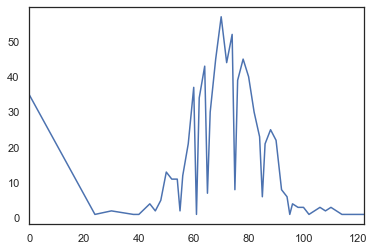

In [29]:
# Visualize each feature with line graph.
diabetes_data.bloodpressure.value_counts().sort_index().plot()
# How many has diabetes from observation who have zero insulin (percentage).
diabetes_data.loc[diabetes_data['insulin']==0].outcome.mean()  

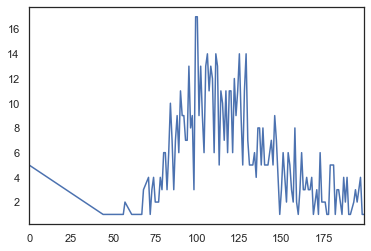

In [30]:
diabetes_data.glucose.value_counts().sort_index().plot()

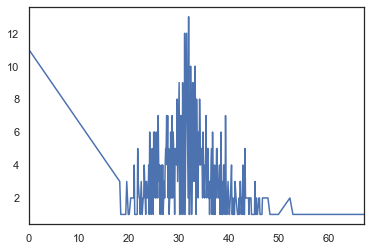

In [31]:
diabetes_data.bmi.value_counts().sort_index().plot()

In [32]:
# Cleaning zero values, convert them into median
# Less then 50 for glucose is considered not sane value.
df.loc[diabetes_data['glucose'] < 50, 'glucose'] = df.glucose.median()  
# Under then 40 bloodpressure means the person is probably about to die. 
df.loc[diabetes_data['bloodpressure'] < 40, 'bloodpressure'] = df.bloodpressure.median()  
# BMI wrong values were only zeros. 
df.loc[diabetes_data['bmi'] == 0, 'bmi'] = df.bmi.median()

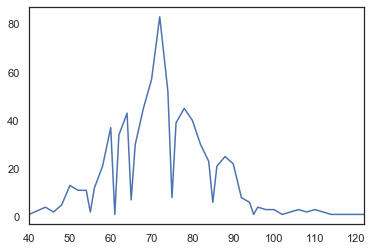

In [33]:
# After cleaning graphs 
df.bloodpressure.value_counts().sort_index().plot()

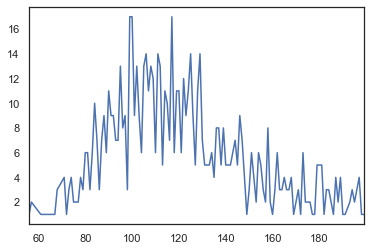

In [34]:
df.glucose.value_counts().sort_index().plot()

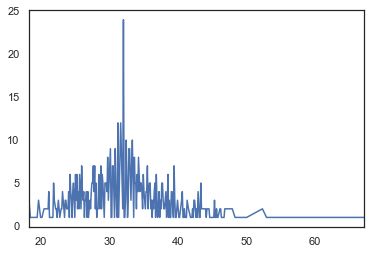

In [35]:
df.bmi.value_counts().sort_index().plot()

In [36]:
# Function that replaces NaN values with normal dist. random. 
def fill_0_with_normalrand(temp_df):
    a = temp_df.values
    m = np.isnan(a) # mask of NaNs
    mu, sigma = temp_df.mean(), temp_df.std()
    a[m] = np.random.normal(mu, sigma, size=m.sum())
    return temp_df

In [37]:
df.skinthickness.replace(0, np.nan, inplace=True)
df.skinthickness

0      35.0
1      29.0
2       NaN
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766     NaN
767    31.0
Name: skinthickness, Length: 768, dtype: float64

In [38]:
fill_0_with_normalrand(df['skinthickness'])

0      35.000000
1      29.000000
2      18.916443
3      23.000000
4      35.000000
         ...    
763    48.000000
764    27.000000
765    23.000000
766    35.166709
767    31.000000
Name: skinthickness, Length: 768, dtype: float64

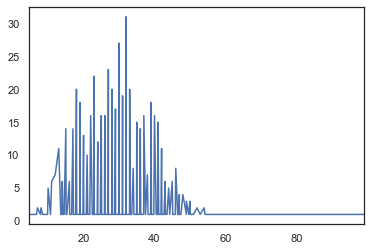

In [39]:
df.skinthickness.value_counts().sort_index().plot()

In [40]:
df.skinthickness.describe()

count    768.000000
mean      29.100473
std       10.314087
min        4.606241
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: skinthickness, dtype: float64

In [41]:
# Replace bad values with normal dist. based on correct values. 
insulin_mean = df.loc[(df['insulin']>0) & (df['insulin']<280), 'insulin'].mean()
insulin_std = df.loc[(df['insulin']>0) & (df['insulin']<280), 'insulin'].std()
zero_ins = df.loc[df['insulin'] == 0, 'insulin']
df.loc[df['insulin'] == 0, 'insulin'] = np.random.normal(insulin_mean, insulin_std, size=zero_ins.count())

In [42]:
above_280 = df.loc[df['insulin'] >= 280, 'insulin']
df.loc[df['insulin'] >= 280, 'insulin'] = np.random.normal(insulin_mean, insulin_std, size=above_280.count())

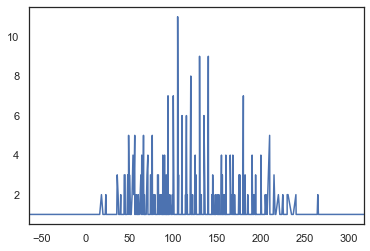

In [43]:
df.insulin.value_counts().sort_index().plot()

In [44]:
diabetes_data.outcome.value_counts()

0    500
1    268
Name: outcome, dtype: int64

0    0.651042
1    0.348958
Name: outcome, dtype: float64

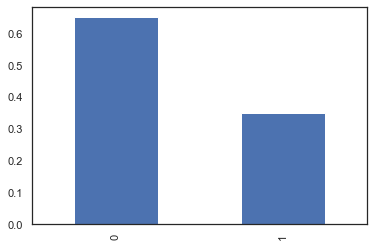

In [45]:
diabetes_data.outcome.value_counts(normalize=True).plot(kind='bar')
diabetes_data.outcome.value_counts(normalize=True)

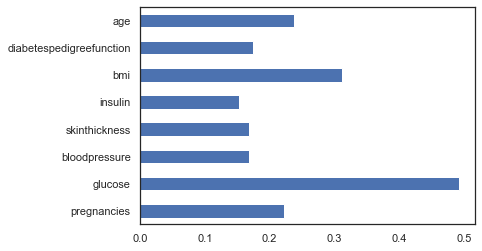

In [46]:
# Cheacking correlations to 'outcome' - our lable feature
df.corr()['outcome'].drop('outcome').plot(kind='barh')

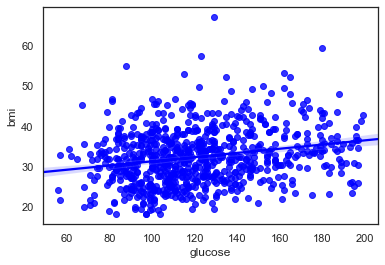

In [47]:
sns.regplot(data = df, x='glucose', y='bmi', color='blue')

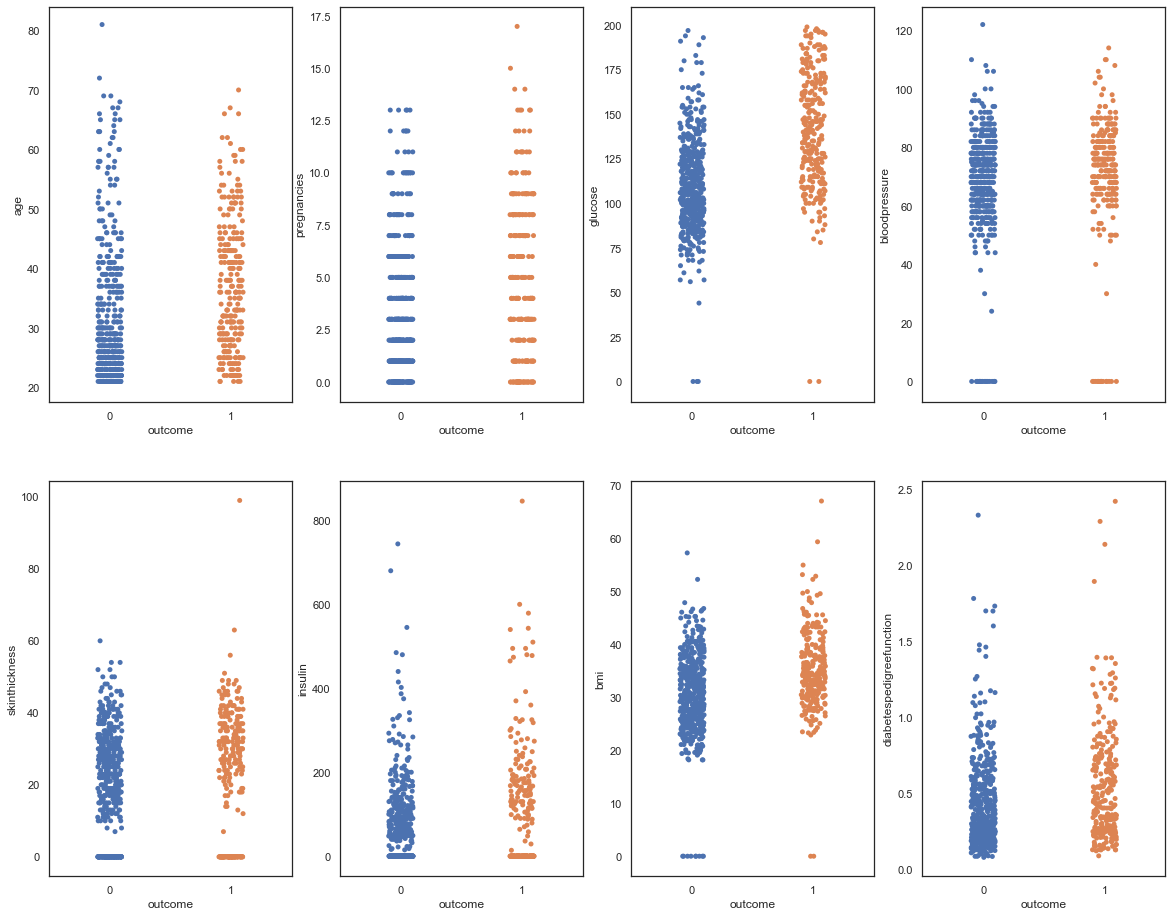

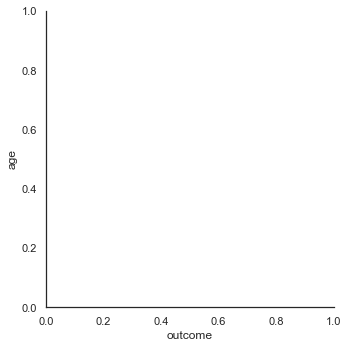

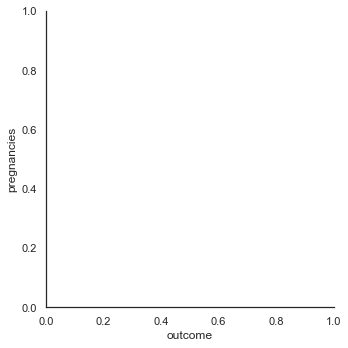

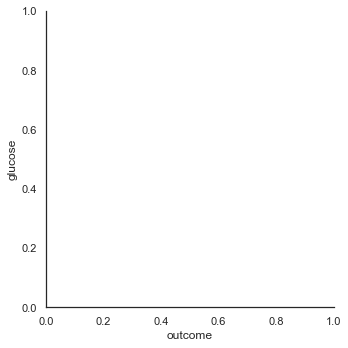

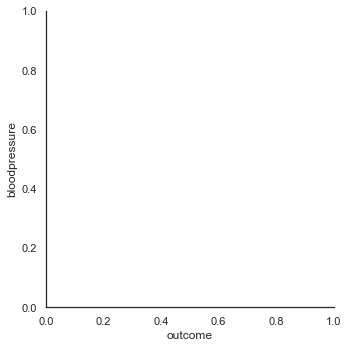

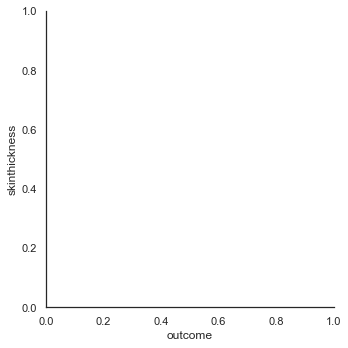

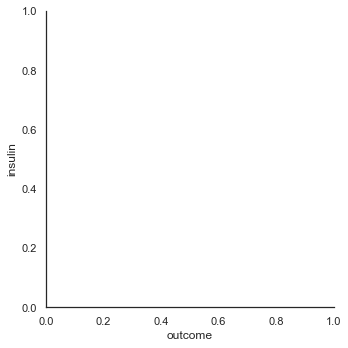

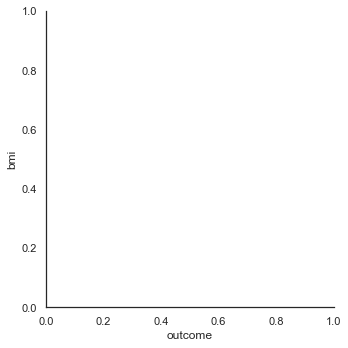

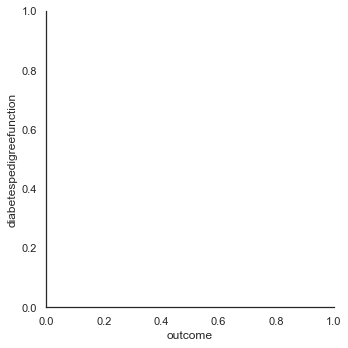

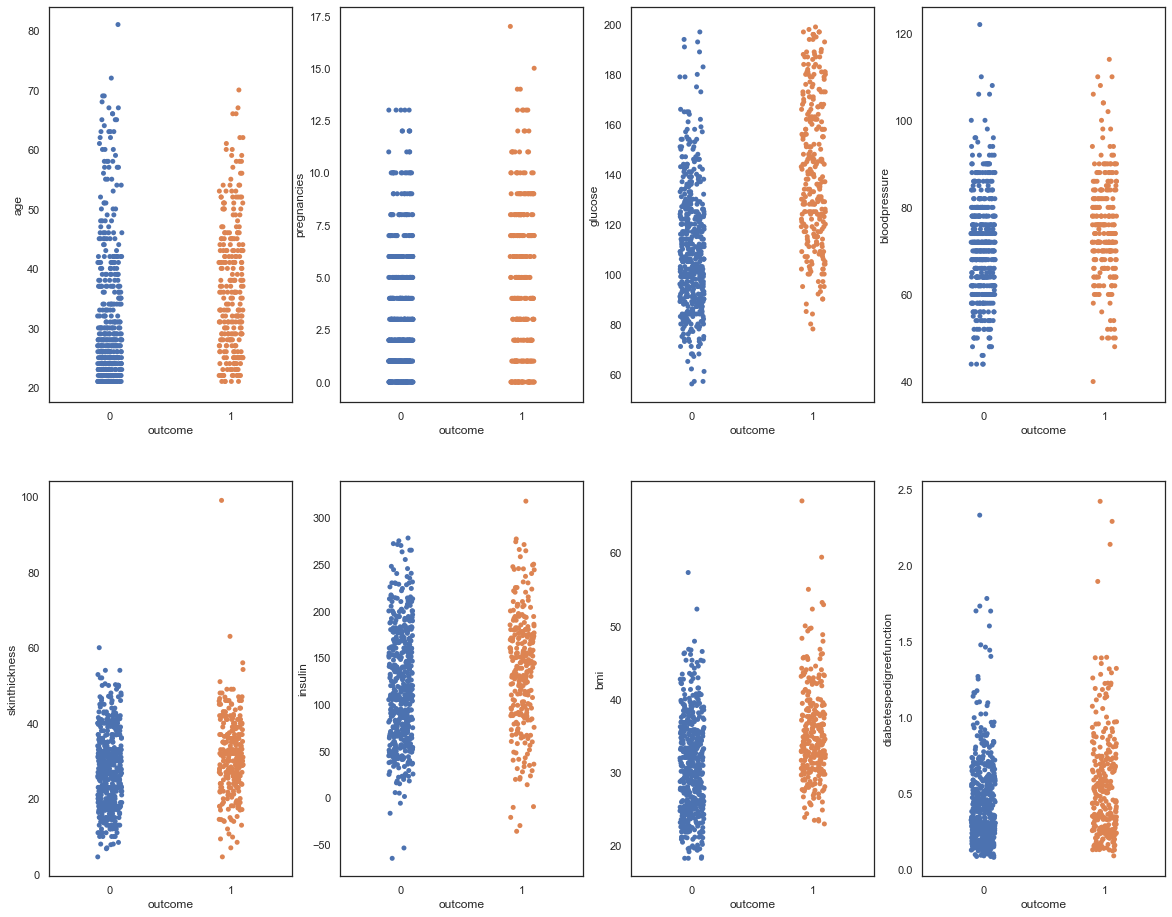

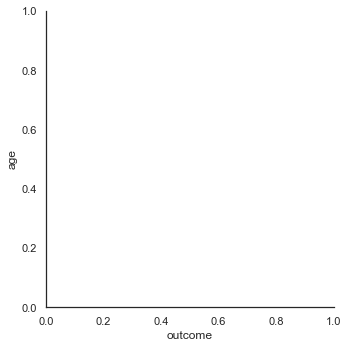

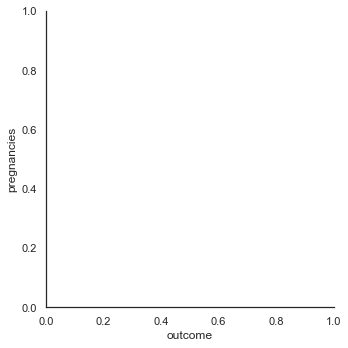

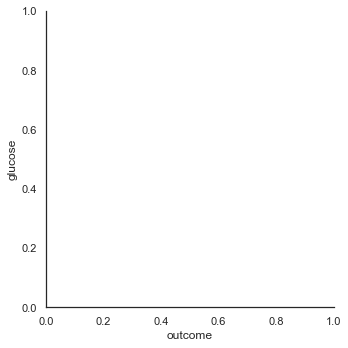

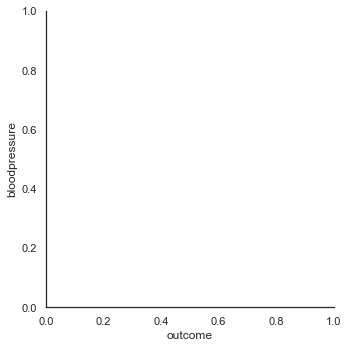

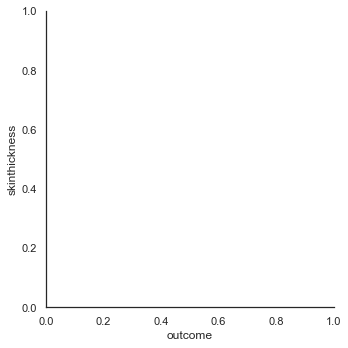

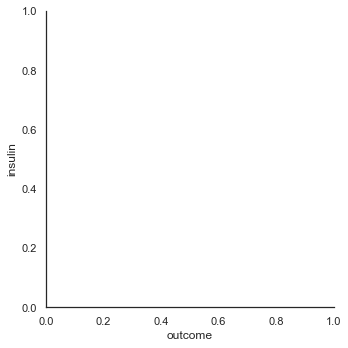

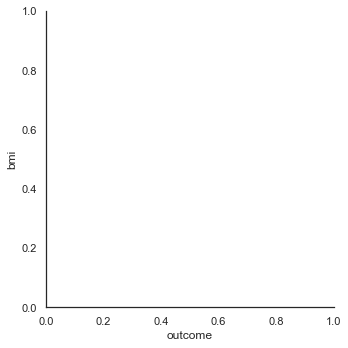

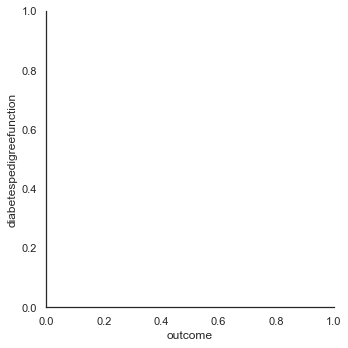

In [48]:
## before changes:
f, axes = plt.subplots(2,4, figsize=(20,16))
#fig, ax = pyplot.subplots(figsize=(15,15))


sns.catplot(x='outcome', y='age', data=diabetes_data, orient='v' , ax=axes[0][0]) #1
sns.catplot(x='outcome', y='pregnancies', data=diabetes_data, orient='v' , ax=axes[0][1]) #2
sns.catplot(x='outcome', y='glucose', data=diabetes_data, orient='v' , ax=axes[0][2]) #3
sns.catplot(x='outcome', y='bloodpressure', data=diabetes_data, orient='v' , ax=axes[0][3]) #4
sns.catplot(x='outcome', y='skinthickness', data=diabetes_data, orient='v' , ax=axes[1][0]) #5
sns.catplot(x='outcome', y='insulin', data=diabetes_data, orient='v' , ax=axes[1][1]) #6
sns.catplot(x='outcome', y='bmi', data=diabetes_data, orient='v' , ax=axes[1][2]) #7
sns.catplot(x='outcome', y='diabetespedigreefunction', data=diabetes_data, orient='v' , ax=axes[1][3]) #8

## After changes:
f, axes = plt.subplots(2,4, figsize=(20,16))

sns.catplot(x='outcome', y='age', data=df, orient='v' , ax=axes[0][0]) #1
sns.catplot(x='outcome', y='pregnancies', data=df, orient='v' , ax=axes[0][1]) #2
sns.catplot(x='outcome', y='glucose', data=df, orient='v' ,ax=axes[0][2]) #3
sns.catplot(x='outcome', y='bloodpressure', data=df, orient='v' , ax=axes[0][3]) #4
sns.catplot(x='outcome', y='skinthickness', data=df, orient='v' ,  ax=axes[1][0]) #5
sns.catplot(x='outcome', y='insulin', data=df, orient='v' , ax=axes[1][1]) #6
sns.catplot(x='outcome', y='bmi', data=df, orient='v' , ax=axes[1][2]) #7
sns.catplot(x='outcome', y='diabetespedigreefunction', data=df, orient='v' , ax=axes[1][3]) #8


# Train and test split

Let's first convert all data to float because some modules warn against other types

In [50]:
df = df.astype(float)

In [51]:
from sklearn.model_selection import train_test_split
X, y = df.drop('outcome', axis=1), df.outcome 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=False)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((691, 8), (691,), (77, 8), (77,))

# Evaluation + Benchmark

As this is a classification problem that is pretty balanced in its labels, we will use accuracy & recall as our evaluation metrics.
We rather to choose recall because we understand that FP patient is not that bad but FN can be impactful. 

In [52]:
y_train.value_counts(normalize=True)

0.0    0.657019
1.0    0.342981
Name: outcome, dtype: float64

In [54]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score

def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value

benchmark_value = 0

y_train_pred = get_benchmark_predictions(X_train, benchmark_value)
y_test_pred = get_benchmark_predictions(X_test, benchmark_value)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('Benchmark accuracy scores: \nTrain accuracy: {0:0.3f}, Test accuracy: {0:0.3f}'.format(train_acc, test_acc))

y_train_pred = get_benchmark_predictions(X_train, benchmark_value)
y_test_pred = get_benchmark_predictions(X_test, benchmark_value)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
print('\nBenchmark recall scores: \nTrain recall: {0:0.3f}, Test recall: {0:0.3f}'.format(train_recall, test_recall))

Benchmark accuracy scores: 
Train accuracy: 0.657, Test accuracy: 0.657

Benchmark recall scores: 
Train recall: 0.000, Test recall: 0.000


# ML Algorithms

#### KNN - checking 15 iterations of k values, simple check based on graph showing training and test accuracy scores

K = 1 
KNN accuracy scores: 
Train accuracy: 1.000, Test accuracy: 1.000
KNN recall scores: 
Train recall: 1.000, Test recall: 1.000

K = 2 
KNN accuracy scores: 
Train accuracy: 0.844, Test accuracy: 0.844
KNN recall scores: 
Train recall: 0.544, Test recall: 0.544

K = 3 
KNN accuracy scores: 
Train accuracy: 0.841, Test accuracy: 0.841
KNN recall scores: 
Train recall: 0.738, Test recall: 0.738

K = 4 
KNN accuracy scores: 
Train accuracy: 0.816, Test accuracy: 0.816
KNN recall scores: 
Train recall: 0.561, Test recall: 0.561

K = 5 
KNN accuracy scores: 
Train accuracy: 0.812, Test accuracy: 0.812
KNN recall scores: 
Train recall: 0.675, Test recall: 0.675

K = 6 
KNN accuracy scores: 
Train accuracy: 0.793, Test accuracy: 0.793
KNN recall scores: 
Train recall: 0.523, Test recall: 0.523

K = 7 
KNN accuracy scores: 
Train accuracy: 0.787, Test accuracy: 0.787
KNN recall scores: 
Train recall: 0.620, Test recall: 0.620

K = 8 
KNN accuracy scores: 
Train accuracy: 0.781, Test accur

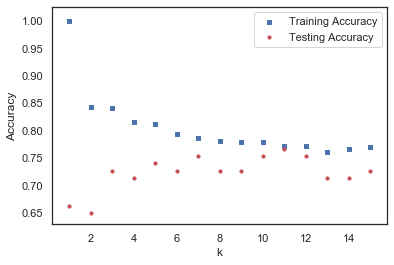

In [55]:
# KNN
import random 
from sklearn.neighbors import KNeighborsClassifier

train_acc_list=[]
test_acc_list=[]
for k in range(1,16):
    r_knn = KNeighborsClassifier(n_neighbors=k, p=1)
    r_knn.fit(X_train, y_train)

    y_train_pred = r_knn.predict(X_train)
    y_test_pred = r_knn.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print('K =',k,'\nKNN accuracy scores: \nTrain accuracy: {0:0.3f}, Test accuracy: {0:0.3f}'.format(train_acc, test_acc))

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print('KNN recall scores: \nTrain recall: {0:0.3f}, Test recall: {0:0.3f}\n'.format(train_recall, test_recall))
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(1, 16), train_acc_list, s=10, c='b', marker="s", label='Training Accuracy')
ax1.scatter(range(1, 16) ,test_acc_list, s=10, c='r', marker="o", label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("k")

plt.legend(loc='upper right');
plt.show()

Although it looks like we can choose the best k based on the graph, we know that we need to check this choise with cross validation tool.  

#### Because the accuracy scores based on the test set only, can be biased, We decided to use cross validation function called GridSearchCV to find the best parameters for each model. 

We choose to optimaize number of k's from range of 1-24 and distance method between 'Manhattan' or 'Euclidean'.

We present the results for the best k according to the CV function.

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

knn =KNeighborsClassifier()
neighbors = list(range(1,25))
params = {
    'n_neighbors':neighbors,
    'p':[1, 2]
         }
knn_cv = GridSearchCV(knn,params,cv=5, n_jobs=-1) # CV=5 - number of folds. 
knn_cv.fit(X_train, y_train)
print("\nBest parameters set found on development set: {}\n".format(knn_cv.best_params_))
means = knn_cv.cv_results_['mean_test_score']
stds = knn_cv.cv_results_['std_test_score']
print("The mean accuracy for this set is:  {0:0.3f}" .format(knn_cv.best_score_))

# Shows different scores for same choosen k (did it only for KNNs, trees have alot of hyperparameters therefore, a lot of results.
for mean, std, param in zip(means, stds, knn_cv.cv_results_['params']):   
    if param['n_neighbors'] == knn_cv.best_params_['n_neighbors']:
        print("\nGrid scores on development set: \n")
        print("\033[94m%0.3f (+/-%0.03f) for %r"
                % (mean, std * 2, param))
        print()
        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, knn_cv.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        print()


Best parameters set found on development set: {'n_neighbors': 16, 'p': 1}

The mean accuracy for this set is:  0.750

Grid scores on development set: 

0.750 (+/-0.036) for {'n_neighbors': 16, 'p': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78        46
         1.0       0.71      0.48      0.58        31

    accuracy                           0.71        77
   macro avg       0.71      0.68      0.68        77
weighted avg       0.71      0.71      0.70        77




Grid scores on development set: 

0.741 (+/-0.074) for {'n_neighbors': 16, 'p': 2}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78        46
  

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNN test_set accuracy score: 0.714
KNN test_set recall score: 0.484

 ROC score for knn with CV configured for {'n_neighbors': 16, 'p': 1} : 0.816


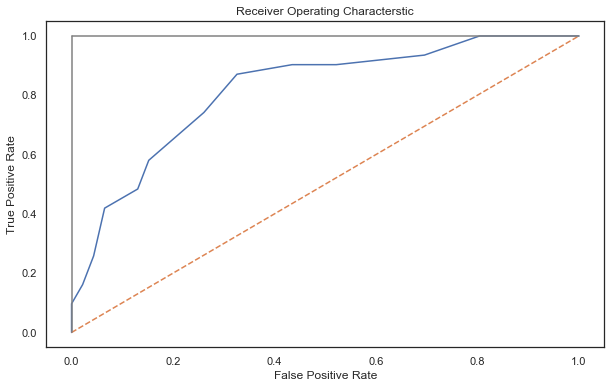

In [57]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score, recall_score

# We will use the parameters we got from CV optimization
clf_knn_opt = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'], p=knn_cv.best_params_['p'])
clf_knn_opt.fit(X_train, y_train)
#Get predicted probabilites from the model
y_probabilities = clf_knn_opt.predict_proba(X_test)[:,1]
y_train_pred = clf_knn_opt.predict(X_train)
y_test_pred = clf_knn_opt.predict(X_test)

#Accuracy scores for best model 
test_accuracy = accuracy_score(y_test, y_test_pred)
print('KNN test_set accuracy score: {0:0.3f}'.format(test_accuracy))

#Recall scores for best model 
test_recall = recall_score(y_test, y_test_pred)
print('KNN test_set recall score: {0:0.3f}'.format(test_recall))

#Create true and false positive rates
FP_rate_knn,TP_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)
ROC_score_knn = roc_auc_score(y_test, y_probabilities)
print('\n\033[1m ROC score for knn with CV configured for', knn_cv.best_params_, ': {0:0.3f}'.format(ROC_score_knn))

#Dict for all scores
Accuracy_scores = {}
Accuracy_scores['knn'] = test_accuracy
Recall_scores = {}
Recall_scores['knn'] = test_recall
ROC_scores = {}
ROC_scores['knn'] = ROC_score_knn


#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic')
plt.plot(FP_rate_knn,TP_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## KNN with standard scaled features

In [58]:
# KNN with scaling
from sklearn.preprocessing import StandardScaler
k_random_values = random.sample(range(1,30), 3)
train_acc_list=[]
test_acc_list=[]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k in k_random_values:
    s_knn = KNeighborsClassifier(n_neighbors=k)
    s_knn.fit(X_train_scaled, y_train)

    y_train_pred = s_knn.predict(X_train_scaled)
    y_test_pred = s_knn.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print('KNN with scale accuracy scores: \nTrain accuracy: {0:0.3f}, Test accuracy: {0:0.3f}'.format(train_acc, test_acc))

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print('KNN with scale recall scores: \nTrain recall: {0:0.3f}, Test recall: {0:0.3f}\n'.format(train_recall, test_recall))
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

KNN with scale accuracy scores: 
Train accuracy: 0.770, Test accuracy: 0.770
KNN with scale recall scores: 
Train recall: 0.473, Test recall: 0.473

KNN with scale accuracy scores: 
Train accuracy: 0.774, Test accuracy: 0.774
KNN with scale recall scores: 
Train recall: 0.498, Test recall: 0.498

KNN with scale accuracy scores: 
Train accuracy: 1.000, Test accuracy: 1.000
KNN with scale recall scores: 
Train recall: 1.000, Test recall: 1.000



We choose to optimaize number of k's from range of 1-24, the distance method between 'Manhattan' or 'Euclidean', and the weights method between 'uniform' or 'distance'.

We present the results for the best k according to the CV function.

In [59]:
clf_s_knn =KNeighborsClassifier()
neighbors = list(range(1,25))
params = {
    'n_neighbors':neighbors,
    'p':[1, 2],
    'weights':['uniform','distance']
         }
s_knn_cv = GridSearchCV(clf_s_knn,params, n_jobs=-1, cv=5)
s_knn_cv.fit(X_train_scaled, y_train)
print("\nBest parameters set found on development set: {}\n".format(s_knn_cv.best_params_))
print("The mean accuracy for this set is: {0:0.3f}".format(s_knn_cv.best_score_))

means = s_knn_cv.cv_results_['mean_test_score']
stds = s_knn_cv.cv_results_['std_test_score']
for mean, std, param in zip(means, stds, s_knn_cv.cv_results_['params']):
    if param['n_neighbors'] == s_knn_cv.best_params_['n_neighbors']:
        print("\nGrid scores on development set: \n")
        print("\033[94m%0.3f (+/-%0.03f) for %r"
                % (mean, std * 2, param))
        print()
        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, s_knn_cv.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        print()



Best parameters set found on development set: {'n_neighbors': 24, 'p': 2, 'weights': 'distance'}

The mean accuracy for this set is: 0.757

Grid scores on development set: 

0.751 (+/-0.033) for {'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        46
         1.0       0.40      1.00      0.57        31

    accuracy                           0.40        77
   macro avg       0.20      0.50      0.29        77
weighted avg       0.16      0.40      0.23        77




Grid scores on development set: 

0.742 (+/-0.012) for {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score 

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After running KNN with scaled x_train and CV optimization parameters. we got slightly better ROC results. 

KNN with scaled features test_set accuracy score: 0.403
KNN with scaled features test_set recall score: 1.000

 ROC score for scaled knn with CV configured for {'n_neighbors': 24, 'p': 2, 'weights': 'distance'} : 0.886


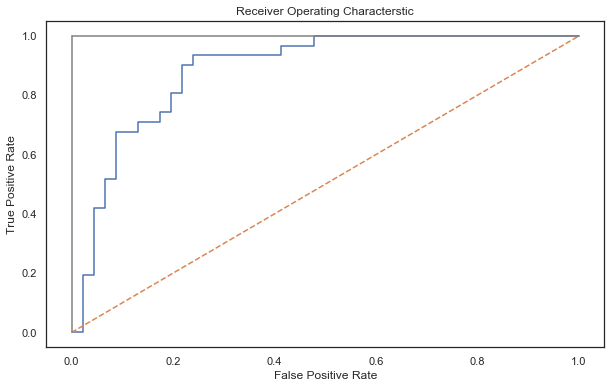

In [60]:
# We will use the parameters we got from CV optimization
clf_s_knn_opt = KNeighborsClassifier(n_neighbors=s_knn_cv.best_params_['n_neighbors'], p=s_knn_cv.best_params_['p'], weights=s_knn_cv.best_params_['weights'])
clf_s_knn_opt.fit(X_train_scaled, y_train)
#Get predicted probabilites from the model
y_probabilities = clf_s_knn_opt.predict_proba(X_test_scaled)[:,1]
y_train_pred = clf_s_knn_opt.predict(X_train)
y_test_pred = clf_s_knn_opt.predict(X_test)

#Accuracy scores for best model 
test_accuracy = accuracy_score(y_test, y_test_pred)
print('KNN with scaled features test_set accuracy score: {0:0.3f}'.format(test_accuracy))

#Recall scores for best model 
test_recall = recall_score(y_test, y_test_pred)
print('KNN with scaled features test_set recall score: {0:0.3f}'.format(test_recall))

#Create true and false positive rates
FP_rate_s_knn,TP_rate_s_knn,threshold_knn = roc_curve(y_test,y_probabilities)
ROC_score_s_knn = roc_auc_score(y_test, y_probabilities)
print('\n\033[1m ROC score for scaled knn with CV configured for', s_knn_cv.best_params_, ': {0:0.3f}'.format(ROC_score_s_knn))

# Adding to scores dict
Accuracy_scores['s_knn'] = test_accuracy
Recall_scores['s_knn'] = test_recall
ROC_scores['s_knn'] = ROC_score_s_knn

#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic')
plt.plot(FP_rate_s_knn,TP_rate_s_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [71]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
train_acc_list = []
test_acc_list = []
max_depth = random.sample(range(1,12), 3)
for d in max_depth:
    tree = DecisionTreeClassifier(max_depth=d, random_state=0)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print('\nTree accuracy scores: \nTrain accuracy: {0:0.3f}, Test accuracy: {0:0.3f}'.format(train_acc, test_acc))

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print('Tree recall scores: \nTrain recall: {0:0.3f}, Test recall: {0:0.3f}'.format(train_recall, test_recall))
    
    train_acc_list.append(accuracy_score(y_train, y_train_pred))
    test_acc_list.append(accuracy_score(y_test, y_test_pred))


Tree accuracy scores: 
Train accuracy: 0.766, Test accuracy: 0.766
Tree recall scores: 
Train recall: 0.401, Test recall: 0.401

Tree accuracy scores: 
Train accuracy: 0.750, Test accuracy: 0.750
Tree recall scores: 
Train recall: 0.363, Test recall: 0.363

Tree accuracy scores: 
Train accuracy: 0.800, Test accuracy: 0.800
Tree recall scores: 
Train recall: 0.734, Test recall: 0.734


#### For trees CV optimization we choose to optimize max_depth, min_samples_split, min_samples_leaf hyperparameters. 

In [72]:
clf_tree = DecisionTreeClassifier(random_state=0)
min_split = list(range(2,21))
min_leaf = list(range(1,15))
max_depth = list(range(3,15))
params = {
    'min_samples_split': min_split, 
    'min_samples_leaf':min_leaf,
    'max_depth':max_depth
}
tree_cv = GridSearchCV(clf_tree, param_grid=params, n_jobs=-1,cv=5)
tree_cv.fit(X_train,y_train)
print("\nBest parameters set found on development set: {}\n".format(tree_cv.best_params_))
results = pd.DataFrame(tree_cv.cv_results_)
print("\n\033[1mThe mean accuracy for this set is: {0:0.3f}" .format(tree_cv.best_score_))




Best parameters set found on development set: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


The mean accuracy for this set is: 0.747


C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTree test_set accuracy score: 0.753
DecisionTree test_set recall score: 0.742

 ROC score for DecisionTree with CV configured for {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2} : 0.824


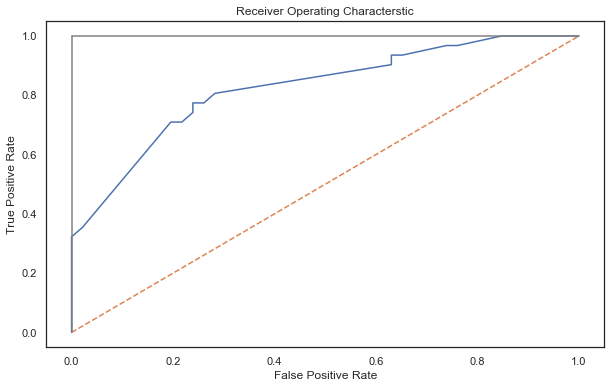

In [73]:
# We will use the parameters we got from CV optimization
clf_tree_opt = DecisionTreeClassifier(max_depth=tree_cv.best_params_['max_depth'], min_samples_leaf=tree_cv.best_params_['min_samples_leaf'],
                          min_samples_split=tree_cv.best_params_['min_samples_split'])
clf_tree_opt.fit(X_train, y_train)
#Get predicted probabilites from the model
y_probabilities = clf_tree_opt.predict_proba(X_test)[:,1]
y_train_pred = clf_tree_opt.predict(X_train)
y_test_pred = clf_tree_opt.predict(X_test)

#Accuracy scores for best model 
test_accuracy = accuracy_score(y_test, y_test_pred)
print('DecisionTree test_set accuracy score: {0:0.3f}'.format(test_accuracy))

#Recall scores for best model 
test_recall = recall_score(y_test, y_test_pred)
print('DecisionTree test_set recall score: {0:0.3f}'.format(test_recall))

#Create true and false positive rates
FP_rate_tree,TP_rate_tree,threshold_knn = roc_curve(y_test,y_probabilities)
ROC_score_tree = roc_auc_score(y_test, y_probabilities)
print('\n\033[1m ROC score for DecisionTree with CV configured for', tree_cv.best_params_, ': {0:0.3f}'.format(ROC_score_tree))

# Adding to ROC dict
Accuracy_scores['DecisionTree'] = test_accuracy
Recall_scores['DecisionTree'] = test_recall
ROC_scores['DecisionTree'] = ROC_score_tree

#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic')
plt.plot(FP_rate_tree,TP_rate_tree)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [74]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
train_acc_list = []
test_acc_list = []
max_depth = random.sample(range(1,12), 3)
for d in max_depth:
    clf = RandomForestClassifier(n_estimators=100, max_depth=d)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print('\nForest accuracy scores: \nTrain accuracy: {0:0.3f}, Test accuracy: {0:0.3f}'.format(train_acc, test_acc))

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print('Forest recall scores: \nTrain recall: {0:0.3f}, Test recall: {0:0.3f}'.format(train_recall, test_recall))
    
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)



Forest accuracy scores: 
Train accuracy: 0.997, Test accuracy: 0.997
Forest recall scores: 
Train recall: 0.992, Test recall: 0.992

Forest accuracy scores: 
Train accuracy: 0.965, Test accuracy: 0.965
Forest recall scores: 
Train recall: 0.924, Test recall: 0.924

Forest accuracy scores: 
Train accuracy: 0.663, Test accuracy: 0.663
Forest recall scores: 
Train recall: 0.017, Test recall: 0.017


In [75]:
clf_forest = RandomForestClassifier(n_estimators=100)
min_split_forest = list(range(2,21))
min_leaf_forest = list(range(1,15))
max_depth_forest = list(range(3,15))
params = {
    'min_samples_split': min_split_forest, 
    'min_samples_leaf':min_leaf_forest,
    'max_depth':max_depth_forest
}

forst_cv = GridSearchCV(clf_forest, param_grid=params, n_jobs=-1,cv=5)
forst_cv.fit(X_train,y_train)
print("\nBest parameters set found on development set: {}\n".format(forst_cv.best_params_))
print("\n\033[1mThe mean accuracy for this set is: {0:0.3f}" .format(forst_cv.best_score_))




Best parameters set found on development set: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 8}


The mean accuracy for this set is: 0.768


RandomForest test_set accuracy score: 0.792
RandomForest test_set recall score: 0.645

 ROC score for RandomForest with CV configured for {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 8} : 0.872


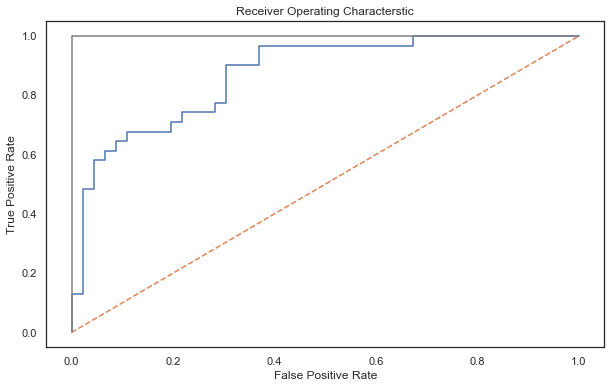

In [76]:
# We will use the parameters we got from CV optimization
clf_forest_opt = RandomForestClassifier(n_estimators=100, max_depth=forst_cv.best_params_['max_depth'], min_samples_leaf=forst_cv.best_params_['min_samples_leaf'],
                          min_samples_split=forst_cv.best_params_['min_samples_split'])
clf_forest_opt.fit(X_train, y_train)
#Get predicted probabilites from the model
y_test_probabilities = clf_forest_opt.predict_proba(X_test)[:,1]
y_test_pred = clf_forest_opt.predict(X_test)

#Accuracy scores for best model 
test_accuracy = accuracy_score(y_test, y_test_pred)
print('RandomForest test_set accuracy score: {0:0.3f}'.format(test_accuracy))

# Recall scores for best model 
test_recall = recall_score(y_test, y_test_pred)
print('RandomForest test_set recall score: {0:0.3f}'.format(test_recall))

#Create true and false positive rates
FP_rate_forest,TP_rate_forest,threshold_knn = roc_curve(y_test,y_test_probabilities)
ROC_score_forest = roc_auc_score(y_test, y_test_probabilities)
print('\n\033[1m ROC score for RandomForest with CV configured for', forst_cv.best_params_, ': {0:0.3f}'.format(ROC_score_forest))

# Adding to ROC dict
Accuracy_scores['RandomForest'] = test_accuracy
Recall_scores['RandomForest'] = test_recall
ROC_scores['RandomForest'] = ROC_score_forest

#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic')
plt.plot(FP_rate_forest,TP_rate_forest)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## RandomForest introspection 

Q7 Answer: We would like to test the feature importance of RandomForest algorithm. 

In [77]:
feature_importances = clf_forest_opt.feature_importances_
features = X_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.sort_values(by='importance', )

,feature,importance
2,bloodpressure,0.065928
0,pregnancies,0.070582
3,skinthickness,0.076230
4,insulin,0.093117
6,diabetespedigreefunction,0.100323
7,age,0.128292
5,bmi,0.169644
1,glucose,0.295885


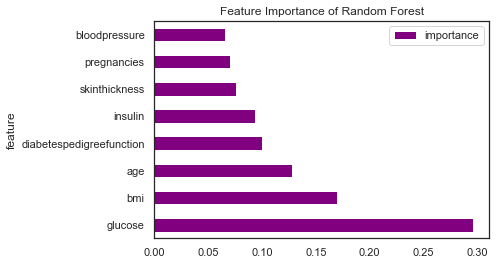

In [78]:
top_10 = stats.sort_values('importance', ascending=False).head(10)
top_10.plot(y='importance', x='feature', kind='barh', color='purple')
plt.title('Feature Importance of Random Forest');

After checking the most important features for this algorithm we found glucose to be the most affect on diabetes. Surprisingly,
bloodpressure has the least affact on the risk of having diabetes, and insulin is also not that affactive as might of have been thought. 

In [79]:
# Ada boost
from sklearn.ensemble import AdaBoostClassifier
train_acc_list = []
test_acc_list = []
max_depth = random.sample(range(1,8), 3)
for d in max_depth:
    boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=d), n_estimators=100, random_state=0)
    boost.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print('\nKBoost accuracy scores: \nTrain accuracy: {0:0.3f}, Test accuracy: {0:0.3f}'.format(train_acc, test_acc))

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print('Boost recall scores: \nTrain recall: {0:0.3f}, Test recall: {0:0.3f}'.format(train_recall, test_recall))
    
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)



KBoost accuracy scores: 
Train accuracy: 0.663, Test accuracy: 0.663
Boost recall scores: 
Train recall: 0.017, Test recall: 0.017

KBoost accuracy scores: 
Train accuracy: 0.663, Test accuracy: 0.663
Boost recall scores: 
Train recall: 0.017, Test recall: 0.017

KBoost accuracy scores: 
Train accuracy: 0.663, Test accuracy: 0.663
Boost recall scores: 
Train recall: 0.017, Test recall: 0.017


In [80]:
clf_Ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=0)
max_depth_forest = list(range(3,15))
params = {
    'base_estimator__max_depth': max_depth_forest
}

Ada_cv = GridSearchCV(clf_Ada, param_grid=params, n_jobs=-1, cv=5)
Ada_cv.fit(X_train,y_train)
print("\nBest parameters set found on development set: {}\n".format(Ada_cv.best_params_))
results = pd.DataFrame(Ada_cv.cv_results_)
print("\n\033[1mThe mean accuracy for this set is: {0:0.3f}" .format(Ada_cv.best_score_))

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Best parameters set found on development set: {'base_estimator__max_depth': 10}


The mean accuracy for this set is: 0.750


#### Comparing to regular cross validation tool 

In [81]:
from sklearn.model_selection import cross_val_score
clasf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=tree_cv.best_params_['max_depth']),
                             n_estimators=100, random_state=0) # Choosen max depth from DecisionTree optimization. 
scores_ada = cross_val_score(clasf_ada, X, y, cv=6)
print('Cross validation simple tool score: ', scores_ada.mean(), 'GridSearchCV score: ', Ada_cv.best_score_)

Cross validation simple tool score:  0.7253612738814624 GridSearchCV score:  0.7496382054992764


AdaBoost test_set accuracy score: 0.753
AdaBoost test_set recall score: 0.000

 ROC score for RandomForest with CV configured for {'base_estimator__max_depth': 10} : 0.872


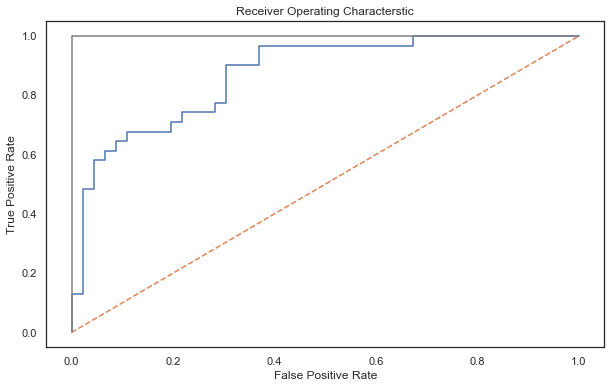

In [82]:
# We will use the parameters we got from CV optimization
clf_Ada_opt = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = Ada_cv.best_params_['base_estimator__max_depth']), n_estimators=100, random_state=0)
clf_Ada_opt.fit(X_train, y_train)
#Get predicted probabilites from the model
y_train_probabilities = clf_Ada_opt.predict_proba(X_train)[:,1]
y_train_pred = clf_Ada_opt.predict(X_train)
y_test_pred = clf_Ada_opt.predict(X_test)

#Accuracy scores for best model 
test_accuracy = accuracy_score(y_test, y_test_pred)
print('AdaBoost test_set accuracy score: {0:0.3f}'.format(test_accuracy))

# Recall scores for best model 
train_recall = recall_score(y_train, y_train_pred)
print('AdaBoost test_set recall score: {0:0.3f}'.format(test_recall))

#Create true and false positive rates
FP_rate_Ada,TP_rate_Ada,threshold_knn = roc_curve(y_test,y_test_probabilities)
ROC_score_Ada = roc_auc_score(y_test, y_test_probabilities)
print('\n\033[1m ROC score for RandomForest with CV configured for', Ada_cv.best_params_, ': {0:0.3f}'.format(ROC_score_Ada))

# Adding to ROC dict
Accuracy_scores['AdaBoost'] = test_accuracy
Recall_scores['AdaBoost'] = test_recall
ROC_scores['AdaBoost'] = ROC_score_Ada

#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic')
plt.plot(FP_rate_Ada,TP_rate_Ada)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Results 

In [83]:
results = pd.DataFrame.from_dict(Accuracy_scores, orient='index')
results['ROC Score'] = ROC_scores.values()
results['Recall Score'] = Recall_scores.values()
results = results.rename(columns={0:'Accuracy Score'})
results 

,Accuracy Score,ROC Score,Recall Score
knn,0.714286,0.815919,0.483871
s_knn,0.402597,0.885694,1.000000
RandomForest,0.792208,0.872370,0.645161
DecisionTree,0.753247,0.824334,0.741935
AdaBoost,0.753247,0.872370,0.000000


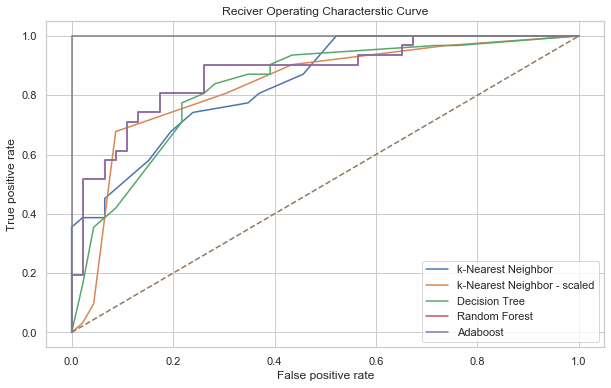

,Accuracy Score,ROC Score,Recall Score
knn,0.740260,0.839762,0.580645
s_knn,0.402597,0.832749,1.000000
DecisionTree,0.753247,0.829944,0.709677
RandomForest,0.792208,0.873773,0.645161
AdaBoost,0.792208,0.873773,0.645161


In [114]:
# ROC scores compairson 
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(FP_rate_knn,TP_rate_knn,label='k-Nearest Neighbor')
plt.plot(FP_rate_s_knn,TP_rate_s_knn,label='k-Nearest Neighbor - scaled')
plt.plot(FP_rate_tree,TP_rate_tree,label='Decision Tree')
plt.plot(FP_rate_forest,TP_rate_forest,label='Random Forest')
plt.plot(FP_rate_Ada,TP_rate_Ada,label='Adaboost')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()
results

### We choose the DecisionTree as having the best results! 

#### Taking into account all the results we presented above, DecisionTree has relatively high accuracy & ROC scores, and more important it has 70.9% recall score (which means that it has the smallest amount of FN errors)   

# Performance vs. amount of data 

The scaled knn model with the optimal parameters (Choosen from CV function) saved under clf_s_knn_opt.

In [86]:
# Creating 10% test accuracy score 
X, y = df.drop('outcome', axis=1), df.outcome 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size = 0.1, random_state=0)
clf_s_knn_opt.fit(X_train, y_train)
y_test_pred = clf_s_knn_opt.predict(X_test)

performance_check = {}
performance_check['10%'] = round(accuracy_score(y_test, y_test_pred),3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size = 0.3,random_state=0)
clf_s_knn_opt.fit(X_train, y_train)
y_test_pred = clf_s_knn_opt.predict(X_test)
performance_check['30%'] = round(accuracy_score(y_test, y_test_pred),3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size = 0.5, random_state=0)
clf_s_knn_opt.fit(X_train, y_train)
y_test_pred = clf_s_knn_opt.predict(X_test)
performance_check['50%'] = round(accuracy_score(y_test, y_test_pred),3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size = 0.7, random_state=0)
clf_s_knn_opt.fit(X_train, y_train)
y_test_pred = clf_s_knn_opt.predict(X_test)
performance_check['70%'] = round(accuracy_score(y_test, y_test_pred),3)

X_train = df.iloc[:,:-1]
clf_s_knn_opt.fit(X_train, df.outcome)
y_test_pred = clf_s_knn_opt.predict(X_test)
performance_check['100%'] = round(accuracy_score(y_test, y_test_pred),3)

performance_check


{'10%': 0.701, '30%': 0.805, '50%': 0.74, '70%': 0.818, '100%': 1.0}

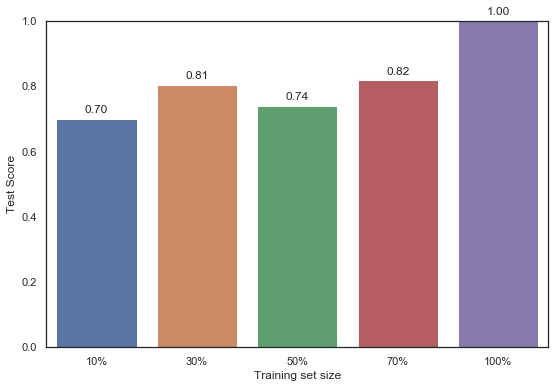

In [85]:
accuracies = list(performance_check.values())
percents = list(performance_check.keys())
data = np.array(accuracies)     
plt.figure(figsize = (9, 6))

splot=sns.barplot(percents,data)
plt.xlabel("Training set size")
plt.ylabel("Test Score")
plt.ylim((0,1))

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()



**Q9 Answer: We can see in the graph above that the accuracy scores didn't improve a lot over the results we achived before, as well as the accuracy score didn't significantly improve when we increase the training set size. Therefore, in our opinion increasing the training set will cause over fitting.**